# Задача № 1

Дана матрица объект-признак
```

X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
     
```

и значения целевой переменной

```

y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным.

Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.

В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.

In [235]:
import numpy as np
import pandas as pd

In [236]:
x = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

у нас задача как про хоккеистов, только признаков не 2, а 4. Переводим наши данные в датафрейм

In [237]:
x_df = pd.DataFrame(x).values
y_df = pd.DataFrame(y).values

In [238]:
x_df.shape

(10, 4)

добавляем признак равный 1 к столбцу с признаками

In [239]:
ones = np.ones((x_df.shape[0], 1))
x_df = np.hstack((ones, x_df))

In [240]:
x_df.shape

(10, 5)

In [241]:
x_df

array([[ 1.        ,  1.22401313,  2.30868478,  3.03636353,  2.69287214],
       [ 1.        , -0.18757272,  1.30337355,  5.12093014,  3.46363202],
       [ 1.        , -0.81094525,  1.82463398,  5.79686488,  1.86159445],
       [ 1.        ,  0.75129018,  2.67392052,  3.65529809,  1.66746094],
       [ 1.        ,  0.00972362,  1.97367255,  2.50594319,  1.69755173],
       [ 1.        , -0.62972637,  0.77750764,  2.84124027,  4.54410559],
       [ 1.        ,  2.29536229,  1.81206697,  1.95026215,  1.51874636],
       [ 1.        ,  0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
       [ 1.        ,  2.39252799,  3.17563985,  3.61420599,  5.10773362],
       [ 1.        ,  0.54983815,  2.87988651,  1.65752765,  1.59635987]])

In [242]:
XTX = x_df.T.dot(x_df)

получаем коэффициенты:

In [243]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_df.T).dot(y_df)

print(b)

[[-7.50726148e-09]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 9.99999999e-01]
 [ 1.00000000e+00]]


то есть получилось, что свободный коэффициент равен 0, а остальные равны 1.

Проверим, что средняя ошибка модели равна 0

In [244]:
z = x_df.dot(b)
e = y_df - z

e

array([[-2.19220198e-09],
       [ 1.12569580e-08],
       [-2.99836600e-09],
       [ 1.17576739e-08],
       [-7.04765224e-09],
       [-2.13781259e-09],
       [-1.58276592e-09],
       [-5.99786354e-09],
       [-1.61779745e-09],
       [ 5.59344571e-10]])

In [245]:
e.mean()

-4.831690603168681e-14

In [246]:
def sum_of_squares(samples: np.ndarray) -> float:
    """Сумма квадратов отклонений.
    """
    
    return ((samples - samples.mean()) ** 2).sum()

In [247]:
R = 1 - sum_of_squares(e) / sum_of_squares(y_df)
R

1.0

In [279]:
x_df

array([[ 1.        ,  1.22401313,  2.30868478,  3.03636353,  2.69287214],
       [ 1.        , -0.18757272,  1.30337355,  5.12093014,  3.46363202],
       [ 1.        , -0.81094525,  1.82463398,  5.79686488,  1.86159445],
       [ 1.        ,  0.75129018,  2.67392052,  3.65529809,  1.66746094],
       [ 1.        ,  0.00972362,  1.97367255,  2.50594319,  1.69755173],
       [ 1.        , -0.62972637,  0.77750764,  2.84124027,  4.54410559],
       [ 1.        ,  2.29536229,  1.81206697,  1.95026215,  1.51874636],
       [ 1.        ,  0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
       [ 1.        ,  2.39252799,  3.17563985,  3.61420599,  5.10773362],
       [ 1.        ,  0.54983815,  2.87988651,  1.65752765,  1.59635987]])

In [283]:
x_34 = np.delete(x_df, [1,2], axis=1)
x_34

array([[1.        , 3.03636353, 2.69287214],
       [1.        , 5.12093014, 3.46363202],
       [1.        , 5.79686488, 1.86159445],
       [1.        , 3.65529809, 1.66746094],
       [1.        , 2.50594319, 1.69755173],
       [1.        , 2.84124027, 4.54410559],
       [1.        , 1.95026215, 1.51874636],
       [1.        , 7.47708735, 2.61081203],
       [1.        , 3.61420599, 5.10773362],
       [1.        , 1.65752765, 1.59635987]])

In [284]:
XTX = x_34.T.dot(x_34)

In [288]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_34.T).dot(y_df)

print(b)

[[3.64001086]
 [0.70753914]
 [1.04851745]]


In [289]:
z_34 = x_34.dot(b)
e_34 = y_df - z_34

e_34

array([[ 0.65005323],
       [-1.19458502],
       [-1.0212859 ],
       [ 0.7733305 ],
       [-1.0060853 ],
       [-2.88174646],
       [ 0.96410803],
       [ 0.78182995],
       [ 2.73735653],
       [ 0.19702444]])

In [291]:
R_34 = 1 - sum_of_squares(e_34) / sum_of_squares(y_df)
R_34

0.6224419876505323

In [292]:
x_24 = np.delete(x_df, [1,3], axis=1)
x_24

array([[1.        , 2.30868478, 2.69287214],
       [1.        , 1.30337355, 3.46363202],
       [1.        , 1.82463398, 1.86159445],
       [1.        , 2.67392052, 1.66746094],
       [1.        , 1.97367255, 1.69755173],
       [1.        , 0.77750764, 4.54410559],
       [1.        , 1.81206697, 1.51874636],
       [1.        , 2.26971361, 2.61081203],
       [1.        , 3.17563985, 5.10773362],
       [1.        , 2.87988651, 1.59635987]])

In [295]:
XTX = x_24.T.dot(x_24)

In [296]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_24.T).dot(y_df)

print(b)

[[1.91685221]
 [1.74373667]
 [1.31971882]]


In [297]:
z_24 = x_24.dot(b)
e_24 = y_df - z_24

e_24

array([[-0.23449097],
       [ 0.93975019],
       [ 1.11683344],
       [-0.03207531],
       [-1.41181729],
       [-1.73643531],
       [ 0.49549979],
       [ 3.12948196],
       [ 0.09500343],
       [-2.3617499 ]])

In [299]:
R_24 = 1 - sum_of_squares(e_24) / sum_of_squares(y_df)
R_24

0.6062055761129934

In [300]:
x_23 = np.delete(x_df, [1,4], axis=1)
x_23

array([[1.        , 2.30868478, 3.03636353],
       [1.        , 1.30337355, 5.12093014],
       [1.        , 1.82463398, 5.79686488],
       [1.        , 2.67392052, 3.65529809],
       [1.        , 1.97367255, 2.50594319],
       [1.        , 0.77750764, 2.84124027],
       [1.        , 1.81206697, 1.95026215],
       [1.        , 2.26971361, 7.47708735],
       [1.        , 3.17563985, 3.61420599],
       [1.        , 2.87988651, 1.65752765]])

In [301]:
XTX = x_23.T.dot(x_23)

In [303]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_23.T).dot(y_df)

print(b)

[[2.48896193]
 [1.60611956]
 [0.86269915]]


In [304]:
z_23 = x_23.dot(b)
e_23 = y_df - z_23

e_23

array([[ 0.44547964],
       [ 0.70020526],
       [-1.74834459],
       [-1.18905078],
       [-1.63389999],
       [ 1.34425942],
       [ 0.49459014],
       [-0.13521545],
       [ 3.58271583],
       [-1.86073949]])

In [305]:
R_23 = 1 - sum_of_squares(e_23) / sum_of_squares(y_df)
R_23

0.547948273403901

In [306]:
x_13 = np.delete(x_df, [2,4], axis=1)
x_13

array([[ 1.        ,  1.22401313,  3.03636353],
       [ 1.        , -0.18757272,  5.12093014],
       [ 1.        , -0.81094525,  5.79686488],
       [ 1.        ,  0.75129018,  3.65529809],
       [ 1.        ,  0.00972362,  2.50594319],
       [ 1.        , -0.62972637,  2.84124027],
       [ 1.        ,  2.29536229,  1.95026215],
       [ 1.        ,  0.0920418 ,  7.47708735],
       [ 1.        ,  2.39252799,  3.61420599],
       [ 1.        ,  0.54983815,  1.65752765]])

In [307]:
XTX = x_13.T.dot(x_13)

In [308]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_13.T).dot(y_df)

print(b)

[[3.62455695]
 [1.62531203]
 [1.21134979]]


In [309]:
z_13 = x_13.dot(b)
e_13 = y_df - z_13

e_13

array([[-0.03012497],
       [ 0.17743258],
       [-0.6564009 ],
       [-0.52551276],
       [-0.48904355],
       [ 1.49033621],
       [-2.14124878],
       [-0.38186703],
       [ 2.3988783 ],
       [ 0.15755089]])

In [310]:
R_13 = 1 - sum_of_squares(e_13) / sum_of_squares(y_df)
R_13

0.763424623879315

In [311]:
x_12 = np.delete(x_df, [3,4], axis=1)
x_12

array([[ 1.        ,  1.22401313,  2.30868478],
       [ 1.        , -0.18757272,  1.30337355],
       [ 1.        , -0.81094525,  1.82463398],
       [ 1.        ,  0.75129018,  2.67392052],
       [ 1.        ,  0.00972362,  1.97367255],
       [ 1.        , -0.62972637,  0.77750764],
       [ 1.        ,  2.29536229,  1.81206697],
       [ 1.        ,  0.0920418 ,  2.26971361],
       [ 1.        ,  2.39252799,  3.17563985],
       [ 1.        ,  0.54983815,  2.87988651]])

In [312]:
XTX = x_12.T.dot(x_12)

In [313]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_12.T).dot(y_df)

print(b)

[[6.70781579]
 [0.40786841]
 [1.03360247]]


In [314]:
z_12 = x_12.dot(b)
e_12 = y_df - z_12

e_12

array([[-0.33138079],
       [ 1.72188207],
       [ 0.40914502],
       [-1.03004444],
       [-2.56488349],
       [ 0.27852302],
       [-1.94054069],
       [ 3.35831645],
       [ 3.32410589],
       [-3.22512304]])

In [315]:
R_12 = 1 - sum_of_squares(e_12) / sum_of_squares(y_df)
R_12

0.18113594742585204

In [317]:
x_14 = np.delete(x_df, [2,3], axis=1)
x_14

array([[ 1.        ,  1.22401313,  2.69287214],
       [ 1.        , -0.18757272,  3.46363202],
       [ 1.        , -0.81094525,  1.86159445],
       [ 1.        ,  0.75129018,  1.66746094],
       [ 1.        ,  0.00972362,  1.69755173],
       [ 1.        , -0.62972637,  4.54410559],
       [ 1.        ,  2.29536229,  1.51874636],
       [ 1.        ,  0.0920418 ,  2.61081203],
       [ 1.        ,  2.39252799,  5.10773362],
       [ 1.        ,  0.54983815,  1.59635987]])

In [318]:
XTX = x_14.T.dot(x_14)

In [319]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_14.T).dot(y_df)

print(b)

[[5.70686123]
 [0.68359949]
 [1.12650707]]


In [320]:
z_14 = x_14.dot(b)
e_14 = y_df - z_14

e_14

array([[-0.3152019 ],
       [ 0.21992042],
       [ 1.42254926],
       [ 0.64912039],
       [-1.43892124],
       [-2.86222056],
       [-1.41041046],
       [ 3.73877561],
       [ 1.19381729],
       [-1.19742881]])

In [321]:
R_14 = 1 - sum_of_squares(e_14) / sum_of_squares(y_df)
R_14

0.4532966783144077

In [323]:
round(max(R_34, R_24, R_14, R_13, R_12, R_23), 8)

0.76342462

Ответ: первый и третий признак

# Задача № 2

Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.

In [328]:
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [329]:
n = x_13.shape[0]
m = x_13.shape[1] - 1

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [330]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

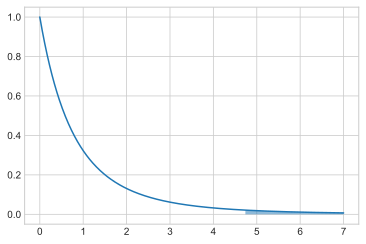

In [331]:
ox = np.linspace(0, 7, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

In [333]:
F = (R_13 / k1) / ((1 - R_13) / k2)
F

11.294439122922636

Ответ: 1. 

Так как статистика попадает в критическую область, то уравнение признается значимым

# Задача № 3

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные:

страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки,

страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки.

Является ли значимым отличие конверсии на страницах `A` и `B`? 

В качестве ответа запишите 1, если является, и 0 иначе.

Предположим, что отличие конверсии не является значимым на страницах А И Б (грубо говоря значения взяты из одной генеральной выборки)

In [339]:
n_a = 2509
n_b = 1465

con_a = 77 / 2509
con_b = 60 / 1465
m_a = 0.5
m_b = 0.5

мат ожидание равно 0,5, либо будет покупка либо нет. Отсюда D(x) = 0.25. Дисперсии для каждой из выборок равны

In [340]:
s1 = 0.25
s2 = 0.25

In [342]:
s_delta = np.sqrt(s1 ** 2 / n_a + s2 ** 2 / n_b)
s_delta

0.008220245670218111

In [343]:
t = (con_a - con_b) / s_delta

t

-1.2488816119403339

In [344]:
df = (s1 ** 2 / n_a + s2 ** 2 / n_b) ** 2 / \
    ((s1 ** 2 / n_a) ** 2 / (n_a - 1) + (s2 ** 2 / n_b) ** 2 / (n_b - 1))

df

3063.166387325311

In [345]:
alpha = 0.05

t1 = stats.t.ppf(alpha / 2, df=df)
t2 = stats.t.ppf(1 - alpha / 2, df=df)

t1, t2

(-1.9607387360991815, 1.960738736099181)

значение статистика не попало в критическую область следовательно мы принимаем тот факт, что отличие конверсии не является значимым

Ответ: 0